In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [2]:

print(f'Current Working Directory: {os.getcwd()}')


Current Working Directory: c:\Users\Admin\Desktop\hackthon data science


In [3]:
if not os.path.exists('train.csv'):
    print('Error: train.csv file not found')
if not os.path.exists('test.csv'):
    print('Error: test.csv file not found')
if not os.path.exists('submission.csv'):
    print('Error: submission.csv file not found')


In [4]:
try:
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    submission_template = pd.read_csv('submission.csv')
except Exception as e:
    print(f'Error reading CSV files: {e}')
    raise


In [5]:
print("Train Data Head:\n", train_data.head())
print("Test Data Head:\n", test_data.head())
print("Submission Template Head:\n", submission_template.head())

Train Data Head:
      Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  
0      standard  Section A               70          73          70  
1  free/reduced  Section C               55          54          52  
2  free/reduced  Section E               56          46          43  
3  free/reduced  Section C               35          47          41  
4      standard  Section C               87          92          81  
Test Data Head:
     Roll no test preparation   gender parental level of education     lunch  \
0  EXA32000              none    male        

In [6]:
print("Columns in train_data:", train_data.columns)


Columns in train_data: Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')


In [7]:
print(train_data.dtypes)


Roll no                        object
test preparation               object
gender                         object
parental level of education    object
lunch                          object
Section                        object
practical score                 int64
viva score                      int64
exam score                      int64
dtype: object


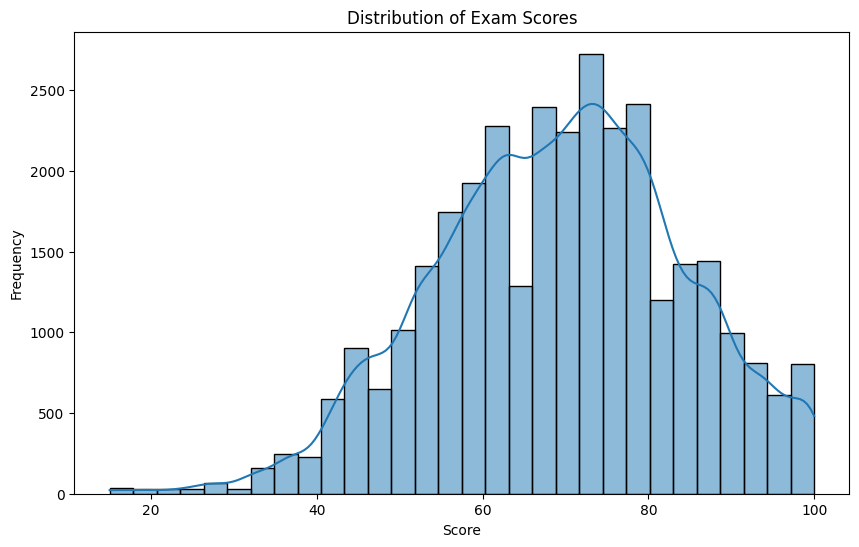

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['exam score'], kde=True, bins=30)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


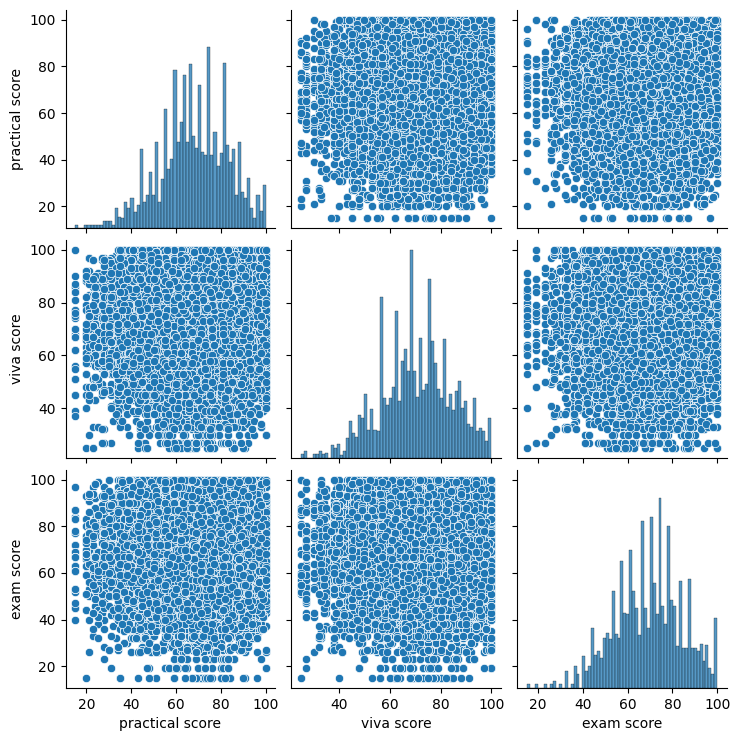

In [9]:
sns.pairplot(train_data)
plt.show()


In [10]:
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)


In [11]:
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)


In [12]:
if 'exam score' not in train_data.columns:
    print("Error: 'exam score' column not found in train_data")
else:
    X = train_data_encoded.drop('exam score', axis=1)
    y = train_data_encoded['exam score']


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (25599, 32018)
y_train shape: (25599,)


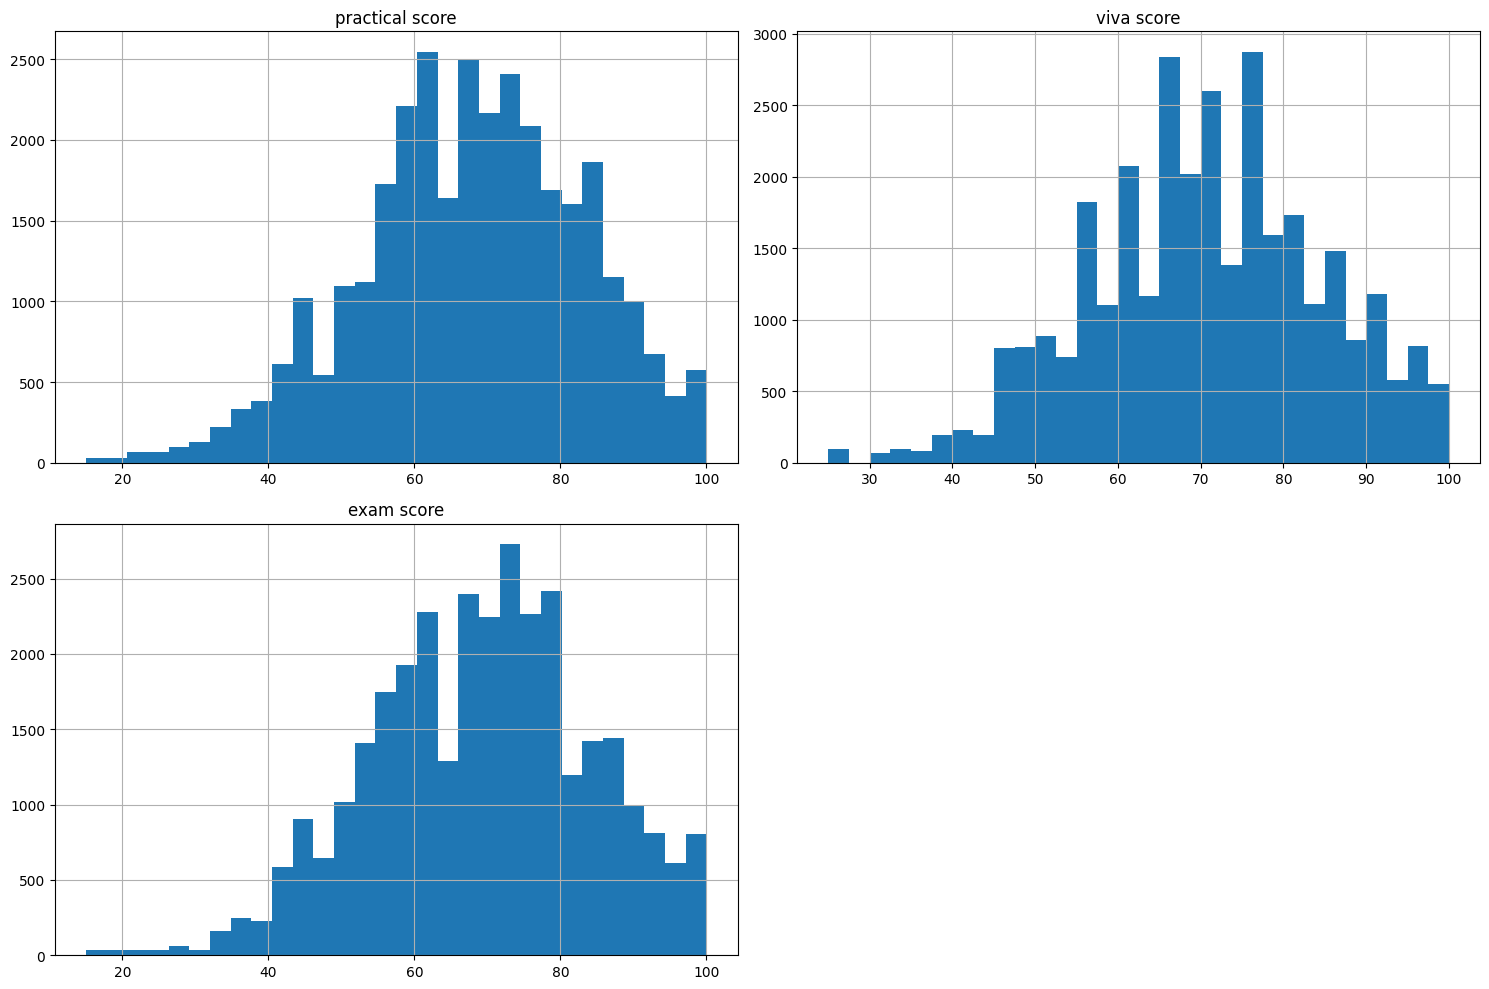

In [14]:
train_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

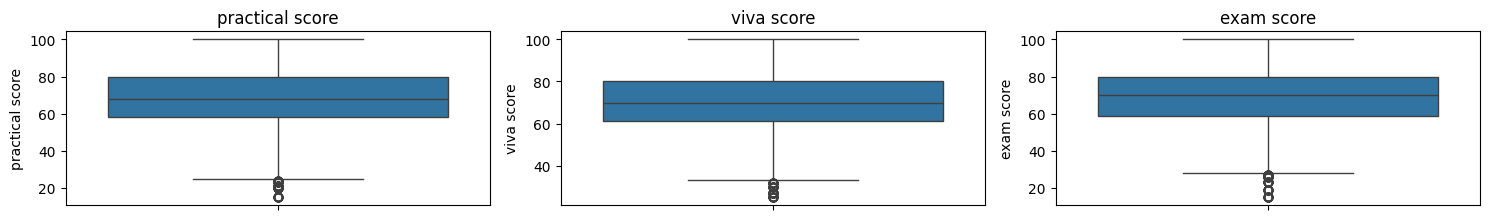

In [15]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(train_data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=train_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()



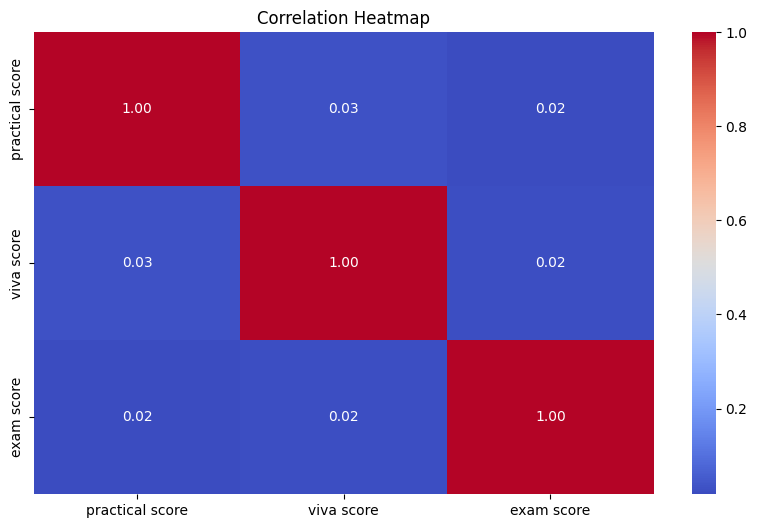

In [16]:
plt.figure(figsize=(10, 6))
corr = train_data[['practical score', 'viva score', 'exam score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


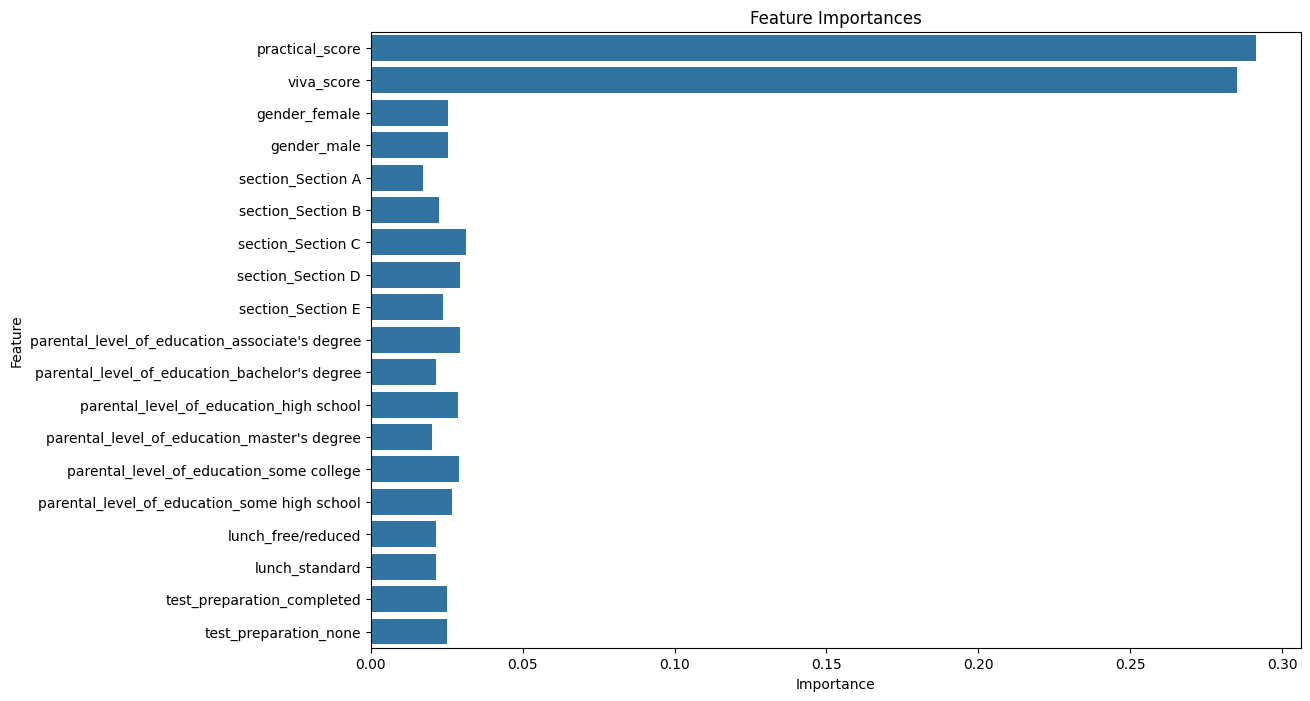

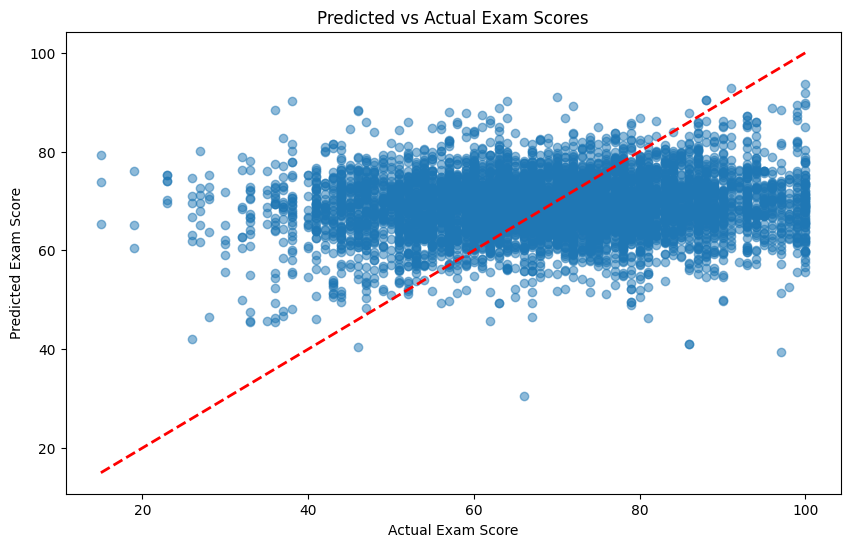

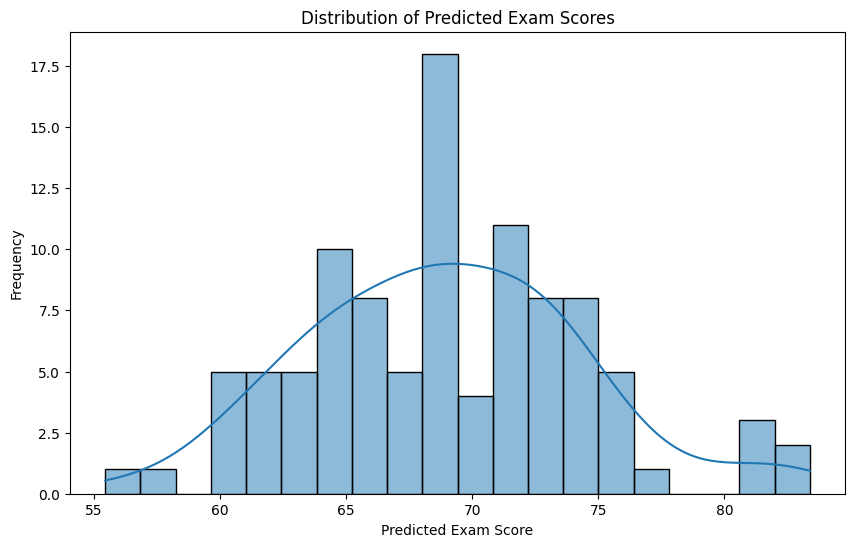

In [35]:

feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
importances = model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicted vs Actual Scores
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Exam Scores')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.show()

# Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, bins=20, kde=True)
plt.title('Distribution of Predicted Exam Scores')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Frequency')
plt.show()